In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
import cv2

In [2]:
#LOAD RASTER DATA
img = cv2.imread('src_raster/25m_tiled_image.tif', cv2.IMREAD_COLOR)

#from rasterio import features
with rasterio.open('out_raster/reclass/vari_reclass_sec.tif') as dvari:
    vari = dvari.read(1).astype(np.float32)
    
with rasterio.open('out_raster/reclass/gli_reclass_sec.tif') as dgli:
    gli = dgli.read(1).astype(np.float32)

with rasterio.open('out_raster/reclass/exg_reclass_sec.tif') as dexg:
    exg = dexg.read(1).astype(np.float32)

In [35]:
#LOAD RASTER DATA
#from rasterio import features
img = cv2.imread('src_raster/25m_tiled_image.tif', cv2.IMREAD_COLOR)

with rasterio.open('out_raster/index/vari.tif') as dvari:
    vari = dvari.read(1).astype(np.float32)
    
with rasterio.open('out_raster/index/gli.tif') as dgli:
    gli = dgli.read(1).astype(np.float32)

with rasterio.open('out_raster/index/exg.tif') as dexg:
    exg = dexg.read(1).astype(np.float32)

Text(0.5, 1.0, 'Excess Green')

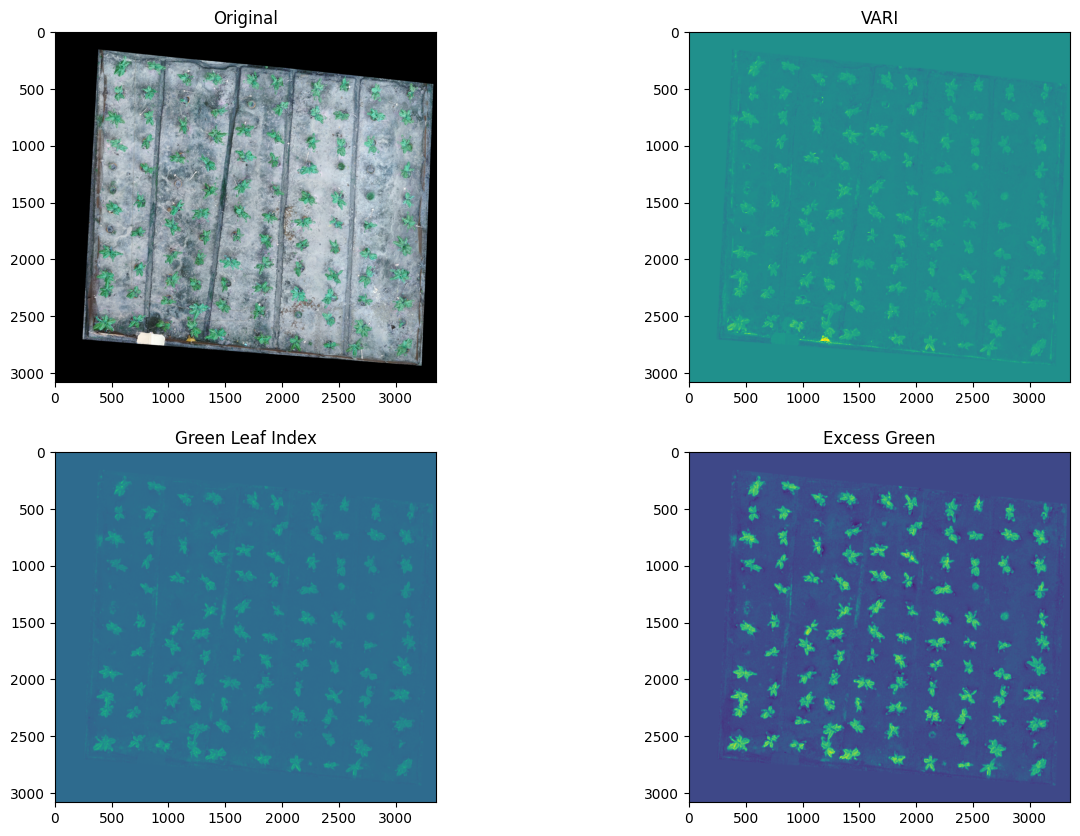

In [38]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].imshow(img)
ax[0,0].set_title('Original')

ax[0,1].imshow(vari)
ax[0,1].set_title('VARI')

ax[1,0].imshow(gli)
ax[1,0].set_title('Green Leaf Index')

ax[1,1].imshow(exg)
ax[1,1].set_title('Excess Green')


Text(0.5, 1.0, 'Excess Green classification relative to N status')

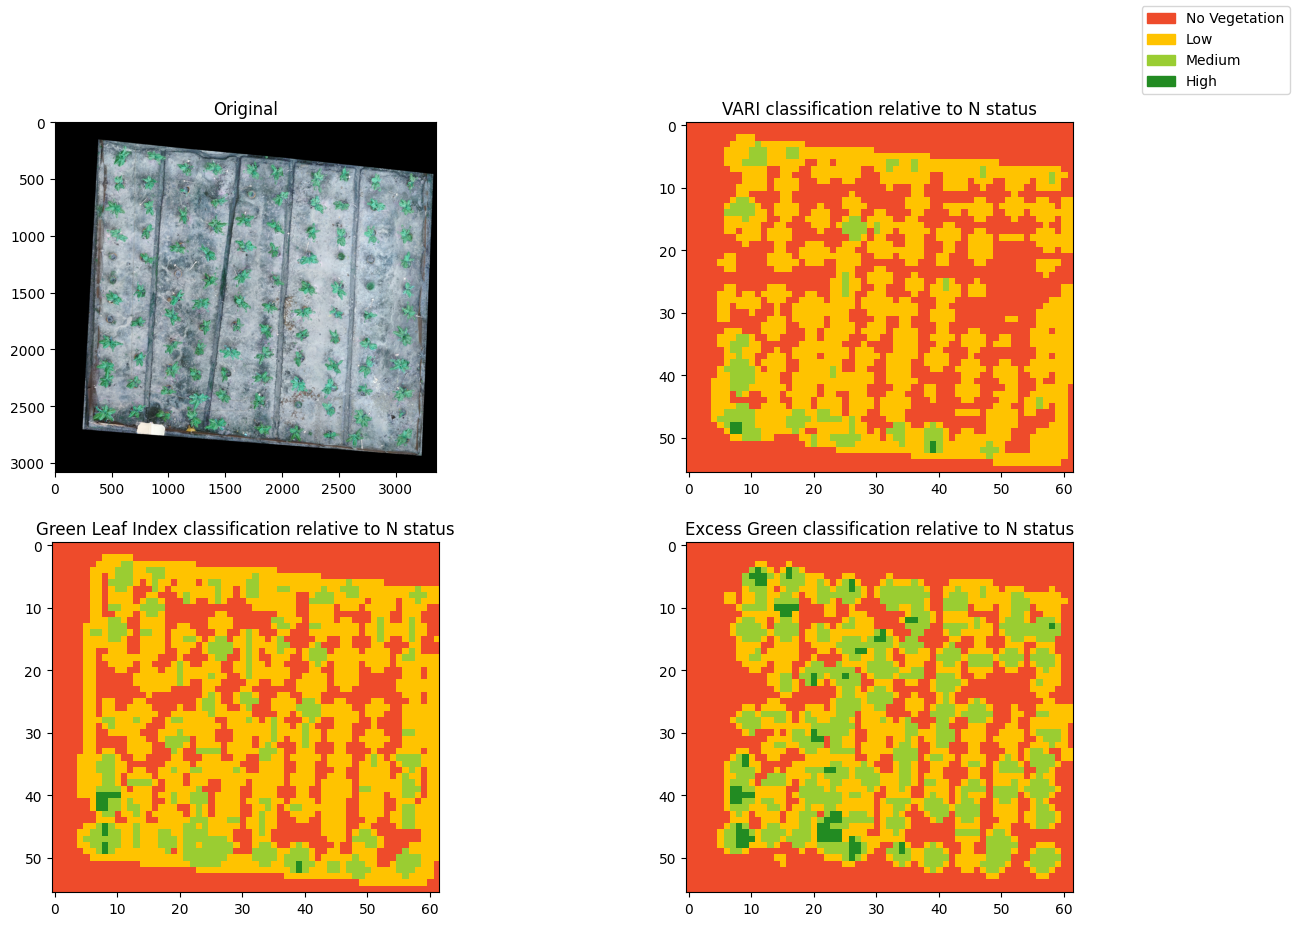

In [7]:
custom_cmap = matplotlib.colors.ListedColormap(['#EE4B2B', '#EE4B2B','#FFC300', '#9ACD32', '#228B22'])
labels = ['', 'No Vegetation', 'Low', 'Medium', 'High']
# Combine the first two labels and colors:
combined_label = 'No Vegetation'
combined_color = '#EE4B2B'  # Use the same color for both

# Create patches for the legend:
patches = [
    mpatches.Patch(color=combined_color, label=combined_label),
    mpatches.Patch(color=custom_cmap.colors[2], label=labels[2]),
    mpatches.Patch(color=custom_cmap.colors[3], label=labels[3]),
    mpatches.Patch(color=custom_cmap.colors[4], label=labels[4]),
]

fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].imshow(img)
ax[0,0].set_title('Original')

ax[0,1].imshow(vari, cmap=custom_cmap)
ax[0,1].set_title('VARI classification relative to N status')
fig.legend(handles=patches, loc='upper right', ncol=1)

ax[1,0].imshow(gli, cmap=custom_cmap)
ax[1,0].set_title('Green Leaf Index classification relative to N status')

ax[1,1].imshow(exg, cmap=custom_cmap)
ax[1,1].set_title('Excess Green classification relative to N status')


In [11]:
fig.savefig('reports/plots.png')